In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, InputLayer
from keras.optimizers import Adadelta, SGD
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from config import *

In [50]:
df = pd.read_excel(filename_all)

df['Date']  = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

# Month
df['Month']  = df['Date'].dt.strftime('%m')
df['Month'] = df['Month'].apply(lambda x: int(x))

# Day
df['Day'] = df['Date'].dt.strftime('%d')
df['Day'] = df['Day'].apply(lambda x: int(x))

# Week
df['Week']  = df['Date'].dt.isocalendar().week
df['Week'] = df['Week'].apply(lambda x: int(x))

df['week_cos'] = np.cos(2 * np.pi * df['Week'] / 7)
df['week_sin'] = np.sin(2 * np.pi * df['Week'] / 7)

df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)

df['day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
df['day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)

In [51]:
df = df[['Day_Name', 'week_cos', 'week_sin', 'first']]

labelencoder = LabelEncoder()
df['Day_Name'] = labelencoder.fit_transform(df['Day_Name'])

ohe = OneHotEncoder()
ohe_df = pd.DataFrame(ohe.fit_transform(df[['Day_Name']]).toarray())
ohe_df.columns = ohe.get_feature_names()
ohe_df = ohe_df.astype(int)

df = df.join(ohe_df)

output = len(df['first'].unique())

In [52]:
df.head()

,Day_Name,week_cos,week_sin,first,x0_0,x0_1,x0_2,x0_3
0,0,-0.222521,-0.974928,4,1,0,0,0
1,1,-0.222521,-0.974928,4,0,1,0,0
2,2,-0.222521,-0.974928,12,0,0,1,0
3,0,-0.900969,-0.433884,2,1,0,0,0
4,1,-0.900969,-0.433884,1,0,1,0,0


In [53]:
X = df.drop(['first', 'Day_Name'], axis = 1)
y = df['first']
y = y.to_numpy()

scaler  = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = test_size, random_state = rand_state)

In [70]:
X

array([[3.56895868e-01, 3.33066907e-16, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.56895868e-01, 3.33066907e-16, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.56895868e-01, 3.33066907e-16, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       ...,
       [3.56895868e-01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.22520934e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 7.22520934e-01, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [54]:
#def baseline_model():
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], )))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(125, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(output, activation='softmax'))

optimizer = Adadelta(learning_rate=0.001, rho = 0.95, epsilon = 1e-07)
    
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 5000, verbose = 1, validation_data = (X_test, y_test))

#prediction_test = model.predict(X_test)



    #return model

#estimator = KerasClassifier(build_fn=baseline_model, epochs=2000, batch_size=10, verbose=1)
#kfold = KFold(n_splits=10, shuffle=True)
#results = cross_val_score(estimator, X, dummy_y, cv=kfold)


Epoch 1/5000
58/58 [==============================] - 1s 8ms/step - loss: 3.2531 - accuracy: 0.0686 - val_loss: 3.2459 - val_accuracy: 0.0859
Epoch 2/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.2620 - accuracy: 0.0507 - val_loss: 3.2455 - val_accuracy: 0.0859
Epoch 3/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.2549 - accuracy: 0.0753 - val_loss: 3.2450 - val_accuracy: 0.0859
Epoch 4/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.2519 - accuracy: 0.0602 - val_loss: 3.2445 - val_accuracy: 0.0859
Epoch 5/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.2552 - accuracy: 0.0531 - val_loss: 3.2440 - val_accuracy: 0.0859
Epoch 6/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.2488 - accuracy: 0.0563 - val_loss: 3.2436 - val_accuracy: 0.0828
Epoch 7/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.2478 - accuracy: 0.0565 - val_loss: 3.2431 - val_accuracy: 0.0828
Epoch 

58/58 [==============================] - 0s 2ms/step - loss: 3.2295 - accuracy: 0.0821 - val_loss: 3.2178 - val_accuracy: 0.0920
Epoch 59/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.2224 - accuracy: 0.0717 - val_loss: 3.2173 - val_accuracy: 0.0920
Epoch 60/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.2186 - accuracy: 0.0727 - val_loss: 3.2167 - val_accuracy: 0.0920
Epoch 61/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.2294 - accuracy: 0.0851 - val_loss: 3.2162 - val_accuracy: 0.0920
Epoch 62/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.2212 - accuracy: 0.0739 - val_loss: 3.2157 - val_accuracy: 0.0920
Epoch 63/5000
58/58 [==============================] - 0s 4ms/step - loss: 3.2228 - accuracy: 0.0557 - val_loss: 3.2152 - val_accuracy: 0.0920
Epoch 64/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.2301 - accuracy: 0.0731 - val_loss: 3.2147 - val_accuracy: 0.0920
Epoch 65/5000

58/58 [==============================] - 0s 3ms/step - loss: 3.1850 - accuracy: 0.0848 - val_loss: 3.1895 - val_accuracy: 0.0982
Epoch 116/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1941 - accuracy: 0.0873 - val_loss: 3.1890 - val_accuracy: 0.0982
Epoch 117/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1968 - accuracy: 0.0786 - val_loss: 3.1885 - val_accuracy: 0.0982
Epoch 118/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.1934 - accuracy: 0.0836 - val_loss: 3.1881 - val_accuracy: 0.0982
Epoch 119/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.1948 - accuracy: 0.0861 - val_loss: 3.1876 - val_accuracy: 0.0982
Epoch 120/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.2010 - accuracy: 0.0813 - val_loss: 3.1871 - val_accuracy: 0.0982
Epoch 121/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.2009 - accuracy: 0.0817 - val_loss: 3.1866 - val_accuracy: 0.0982
Epoch 1

Epoch 172/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1697 - accuracy: 0.0925 - val_loss: 3.1623 - val_accuracy: 0.0951
Epoch 173/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1601 - accuracy: 0.1049 - val_loss: 3.1618 - val_accuracy: 0.0951
Epoch 174/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1777 - accuracy: 0.0879 - val_loss: 3.1613 - val_accuracy: 0.0951
Epoch 175/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1732 - accuracy: 0.0969 - val_loss: 3.1609 - val_accuracy: 0.0951
Epoch 176/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1656 - accuracy: 0.0871 - val_loss: 3.1604 - val_accuracy: 0.0951
Epoch 177/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1703 - accuracy: 0.1076 - val_loss: 3.1600 - val_accuracy: 0.0951
Epoch 178/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.1609 - accuracy: 0.1101 - val_loss: 3.1595 - val_accuracy:

Epoch 229/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1321 - accuracy: 0.1157 - val_loss: 3.1363 - val_accuracy: 0.1043
Epoch 230/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1415 - accuracy: 0.1020 - val_loss: 3.1358 - val_accuracy: 0.1043
Epoch 231/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1446 - accuracy: 0.0954 - val_loss: 3.1354 - val_accuracy: 0.1043
Epoch 232/5000
58/58 [==============================] - 0s 4ms/step - loss: 3.1470 - accuracy: 0.0798 - val_loss: 3.1350 - val_accuracy: 0.1043
Epoch 233/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1380 - accuracy: 0.1060 - val_loss: 3.1345 - val_accuracy: 0.1043
Epoch 234/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1288 - accuracy: 0.1180 - val_loss: 3.1341 - val_accuracy: 0.1043
Epoch 235/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1322 - accuracy: 0.1078 - val_loss: 3.1336 - val_accuracy:

Epoch 286/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1111 - accuracy: 0.0997 - val_loss: 3.1115 - val_accuracy: 0.1043
Epoch 287/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1160 - accuracy: 0.1058 - val_loss: 3.1111 - val_accuracy: 0.1043
Epoch 288/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1082 - accuracy: 0.1168 - val_loss: 3.1106 - val_accuracy: 0.1043
Epoch 289/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1162 - accuracy: 0.1147 - val_loss: 3.1102 - val_accuracy: 0.1043
Epoch 290/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.1317 - accuracy: 0.0953 - val_loss: 3.1098 - val_accuracy: 0.1043
Epoch 291/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.1067 - accuracy: 0.1134 - val_loss: 3.1093 - val_accuracy: 0.1043
Epoch 292/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1230 - accuracy: 0.0898 - val_loss: 3.1089 - val_accuracy:

58/58 [==============================] - 0s 2ms/step - loss: 3.0877 - accuracy: 0.1092 - val_loss: 3.0883 - val_accuracy: 0.1104
Epoch 343/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.0886 - accuracy: 0.1091 - val_loss: 3.0879 - val_accuracy: 0.1104
Epoch 344/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.0816 - accuracy: 0.1141 - val_loss: 3.0875 - val_accuracy: 0.1104
Epoch 345/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.0849 - accuracy: 0.1107 - val_loss: 3.0871 - val_accuracy: 0.1104
Epoch 346/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.0956 - accuracy: 0.1012 - val_loss: 3.0867 - val_accuracy: 0.1104
Epoch 347/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.0862 - accuracy: 0.1184 - val_loss: 3.0863 - val_accuracy: 0.1104
Epoch 348/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.1001 - accuracy: 0.1172 - val_loss: 3.0859 - val_accuracy: 0.1104
Epoch 3

Epoch 399/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.0765 - accuracy: 0.1129 - val_loss: 3.0659 - val_accuracy: 0.1043
Epoch 400/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.0711 - accuracy: 0.1204 - val_loss: 3.0655 - val_accuracy: 0.1043
Epoch 401/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.0554 - accuracy: 0.1178 - val_loss: 3.0651 - val_accuracy: 0.1043
Epoch 402/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.0676 - accuracy: 0.1109 - val_loss: 3.0647 - val_accuracy: 0.1043
Epoch 403/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.0681 - accuracy: 0.1127 - val_loss: 3.0643 - val_accuracy: 0.1043
Epoch 404/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.0505 - accuracy: 0.1154 - val_loss: 3.0639 - val_accuracy: 0.1043
Epoch 405/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.0753 - accuracy: 0.1039 - val_loss: 3.0635 - val_accuracy:

Epoch 456/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.0574 - accuracy: 0.1125 - val_loss: 3.0444 - val_accuracy: 0.1012
Epoch 457/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.0412 - accuracy: 0.1069 - val_loss: 3.0441 - val_accuracy: 0.1012
Epoch 458/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.0403 - accuracy: 0.1125 - val_loss: 3.0437 - val_accuracy: 0.1012
Epoch 459/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.0460 - accuracy: 0.1237 - val_loss: 3.0433 - val_accuracy: 0.1012
Epoch 460/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.0393 - accuracy: 0.1118 - val_loss: 3.0430 - val_accuracy: 0.1012
Epoch 461/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.0359 - accuracy: 0.1393 - val_loss: 3.0426 - val_accuracy: 0.1012
Epoch 462/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.0522 - accuracy: 0.1115 - val_loss: 3.0422 - val_accuracy:

Epoch 513/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.0287 - accuracy: 0.1250 - val_loss: 3.0241 - val_accuracy: 0.1012
Epoch 514/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.0096 - accuracy: 0.1304 - val_loss: 3.0238 - val_accuracy: 0.1012
Epoch 515/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.0251 - accuracy: 0.1209 - val_loss: 3.0234 - val_accuracy: 0.1012
Epoch 516/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.0124 - accuracy: 0.1261 - val_loss: 3.0231 - val_accuracy: 0.1012
Epoch 517/5000
58/58 [==============================] - 0s 2ms/step - loss: 3.0218 - accuracy: 0.1208 - val_loss: 3.0227 - val_accuracy: 0.1012
Epoch 518/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.0310 - accuracy: 0.1125 - val_loss: 3.0224 - val_accuracy: 0.1012
Epoch 519/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.0231 - accuracy: 0.1167 - val_loss: 3.0221 - val_accuracy:

58/58 [==============================] - 0s 4ms/step - loss: 3.0139 - accuracy: 0.1107 - val_loss: 3.0052 - val_accuracy: 0.1012
Epoch 570/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.9983 - accuracy: 0.1119 - val_loss: 3.0048 - val_accuracy: 0.1012
Epoch 571/5000
58/58 [==============================] - 0s 4ms/step - loss: 3.0021 - accuracy: 0.1286 - val_loss: 3.0045 - val_accuracy: 0.1012
Epoch 572/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.9974 - accuracy: 0.1264 - val_loss: 3.0042 - val_accuracy: 0.1012
Epoch 573/5000
58/58 [==============================] - 0s 4ms/step - loss: 3.0110 - accuracy: 0.1239 - val_loss: 3.0038 - val_accuracy: 0.1012
Epoch 574/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.0066 - accuracy: 0.1238 - val_loss: 3.0035 - val_accuracy: 0.1012
Epoch 575/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.0187 - accuracy: 0.1268 - val_loss: 3.0032 - val_accuracy: 0.1012
Epoch 5

Epoch 626/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9768 - accuracy: 0.1514 - val_loss: 2.9869 - val_accuracy: 0.1012
Epoch 627/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9760 - accuracy: 0.1263 - val_loss: 2.9866 - val_accuracy: 0.1012
Epoch 628/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9876 - accuracy: 0.1155 - val_loss: 2.9863 - val_accuracy: 0.1012
Epoch 629/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9965 - accuracy: 0.1171 - val_loss: 2.9859 - val_accuracy: 0.1012
Epoch 630/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9850 - accuracy: 0.1217 - val_loss: 2.9856 - val_accuracy: 0.1012
Epoch 631/5000
58/58 [==============================] - 0s 3ms/step - loss: 3.0011 - accuracy: 0.1135 - val_loss: 2.9853 - val_accuracy: 0.1012
Epoch 632/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9694 - accuracy: 0.1347 - val_loss: 2.9850 - val_accuracy:

Epoch 683/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9794 - accuracy: 0.1311 - val_loss: 2.9697 - val_accuracy: 0.1043
Epoch 684/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9565 - accuracy: 0.1225 - val_loss: 2.9694 - val_accuracy: 0.1043
Epoch 685/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.9854 - accuracy: 0.1071 - val_loss: 2.9691 - val_accuracy: 0.1043
Epoch 686/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9655 - accuracy: 0.1255 - val_loss: 2.9688 - val_accuracy: 0.1074
Epoch 687/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9826 - accuracy: 0.1147 - val_loss: 2.9685 - val_accuracy: 0.1074
Epoch 688/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9705 - accuracy: 0.1238 - val_loss: 2.9682 - val_accuracy: 0.1074
Epoch 689/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9572 - accuracy: 0.1324 - val_loss: 2.9679 - val_accuracy:

Epoch 740/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9651 - accuracy: 0.1109 - val_loss: 2.9536 - val_accuracy: 0.1074
Epoch 741/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9497 - accuracy: 0.1323 - val_loss: 2.9533 - val_accuracy: 0.1074
Epoch 742/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9555 - accuracy: 0.1175 - val_loss: 2.9530 - val_accuracy: 0.1074
Epoch 743/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9460 - accuracy: 0.1412 - val_loss: 2.9528 - val_accuracy: 0.1074
Epoch 744/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9500 - accuracy: 0.1211 - val_loss: 2.9525 - val_accuracy: 0.1074
Epoch 745/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9499 - accuracy: 0.1177 - val_loss: 2.9522 - val_accuracy: 0.1074
Epoch 746/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.9475 - accuracy: 0.1198 - val_loss: 2.9519 - val_accuracy:

Epoch 797/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9452 - accuracy: 0.1185 - val_loss: 2.9385 - val_accuracy: 0.1074
Epoch 798/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9440 - accuracy: 0.1273 - val_loss: 2.9382 - val_accuracy: 0.1074
Epoch 799/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9400 - accuracy: 0.1227 - val_loss: 2.9380 - val_accuracy: 0.1074
Epoch 800/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9277 - accuracy: 0.1276 - val_loss: 2.9377 - val_accuracy: 0.1074
Epoch 801/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9461 - accuracy: 0.1019 - val_loss: 2.9375 - val_accuracy: 0.1074
Epoch 802/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9282 - accuracy: 0.1488 - val_loss: 2.9372 - val_accuracy: 0.1074
Epoch 803/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9280 - accuracy: 0.1302 - val_loss: 2.9369 - val_accuracy:

Epoch 854/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.9183 - accuracy: 0.1377 - val_loss: 2.9243 - val_accuracy: 0.1074
Epoch 855/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.9126 - accuracy: 0.1386 - val_loss: 2.9240 - val_accuracy: 0.1074
Epoch 856/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8980 - accuracy: 0.1630 - val_loss: 2.9238 - val_accuracy: 0.1074
Epoch 857/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9258 - accuracy: 0.1363 - val_loss: 2.9236 - val_accuracy: 0.1074
Epoch 858/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.9206 - accuracy: 0.1274 - val_loss: 2.9233 - val_accuracy: 0.1074
Epoch 859/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.9233 - accuracy: 0.1255 - val_loss: 2.9231 - val_accuracy: 0.1074
Epoch 860/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.8989 - accuracy: 0.1556 - val_loss: 2.9228 - val_accuracy:

Epoch 911/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9171 - accuracy: 0.1297 - val_loss: 2.9111 - val_accuracy: 0.1166
Epoch 912/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.9148 - accuracy: 0.1321 - val_loss: 2.9108 - val_accuracy: 0.1166
Epoch 913/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9116 - accuracy: 0.1352 - val_loss: 2.9106 - val_accuracy: 0.1166
Epoch 914/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8981 - accuracy: 0.1450 - val_loss: 2.9104 - val_accuracy: 0.1166
Epoch 915/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9067 - accuracy: 0.1447 - val_loss: 2.9102 - val_accuracy: 0.1166
Epoch 916/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.9100 - accuracy: 0.1240 - val_loss: 2.9099 - val_accuracy: 0.1166
Epoch 917/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9154 - accuracy: 0.1242 - val_loss: 2.9097 - val_accuracy:

Epoch 968/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8837 - accuracy: 0.1396 - val_loss: 2.8988 - val_accuracy: 0.1196
Epoch 969/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8912 - accuracy: 0.1254 - val_loss: 2.8986 - val_accuracy: 0.1196
Epoch 970/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8884 - accuracy: 0.1338 - val_loss: 2.8984 - val_accuracy: 0.1196
Epoch 971/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8945 - accuracy: 0.1360 - val_loss: 2.8982 - val_accuracy: 0.1196
Epoch 972/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8880 - accuracy: 0.1565 - val_loss: 2.8980 - val_accuracy: 0.1196
Epoch 973/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9187 - accuracy: 0.1218 - val_loss: 2.8978 - val_accuracy: 0.1196
Epoch 974/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8942 - accuracy: 0.1280 - val_loss: 2.8976 - val_accuracy:

Epoch 1025/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.8711 - accuracy: 0.1386 - val_loss: 2.8875 - val_accuracy: 0.1196
Epoch 1026/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8805 - accuracy: 0.1357 - val_loss: 2.8874 - val_accuracy: 0.1196
Epoch 1027/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8766 - accuracy: 0.1352 - val_loss: 2.8872 - val_accuracy: 0.1196
Epoch 1028/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8880 - accuracy: 0.1201 - val_loss: 2.8870 - val_accuracy: 0.1196
Epoch 1029/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8901 - accuracy: 0.1214 - val_loss: 2.8868 - val_accuracy: 0.1196
Epoch 1030/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8953 - accuracy: 0.1217 - val_loss: 2.8866 - val_accuracy: 0.1196
Epoch 1031/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8927 - accuracy: 0.1193 - val_loss: 2.8864 - val_ac

58/58 [==============================] - 0s 3ms/step - loss: 2.8611 - accuracy: 0.1279 - val_loss: 2.8774 - val_accuracy: 0.1196
Epoch 1082/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8742 - accuracy: 0.1268 - val_loss: 2.8772 - val_accuracy: 0.1196
Epoch 1083/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.9074 - accuracy: 0.1427 - val_loss: 2.8770 - val_accuracy: 0.1196
Epoch 1084/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8752 - accuracy: 0.1325 - val_loss: 2.8768 - val_accuracy: 0.1196
Epoch 1085/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8726 - accuracy: 0.1380 - val_loss: 2.8767 - val_accuracy: 0.1196
Epoch 1086/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8783 - accuracy: 0.1207 - val_loss: 2.8765 - val_accuracy: 0.1196
Epoch 1087/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8689 - accuracy: 0.1336 - val_loss: 2.8763 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.8913 - accuracy: 0.1188 - val_loss: 2.8680 - val_accuracy: 0.1196
Epoch 1138/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8822 - accuracy: 0.1350 - val_loss: 2.8679 - val_accuracy: 0.1196
Epoch 1139/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8479 - accuracy: 0.1333 - val_loss: 2.8677 - val_accuracy: 0.1196
Epoch 1140/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8683 - accuracy: 0.1347 - val_loss: 2.8676 - val_accuracy: 0.1196
Epoch 1141/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8584 - accuracy: 0.1394 - val_loss: 2.8674 - val_accuracy: 0.1196
Epoch 1142/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8462 - accuracy: 0.1473 - val_loss: 2.8672 - val_accuracy: 0.1196
Epoch 1143/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8665 - accuracy: 0.1312 - val_loss: 2.8671 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8783 - accuracy: 0.1126 - val_loss: 2.8595 - val_accuracy: 0.1196
Epoch 1194/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8498 - accuracy: 0.1337 - val_loss: 2.8594 - val_accuracy: 0.1196
Epoch 1195/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8446 - accuracy: 0.1521 - val_loss: 2.8592 - val_accuracy: 0.1196
Epoch 1196/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8638 - accuracy: 0.1473 - val_loss: 2.8591 - val_accuracy: 0.1196
Epoch 1197/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8467 - accuracy: 0.1243 - val_loss: 2.8589 - val_accuracy: 0.1196
Epoch 1198/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8498 - accuracy: 0.1256 - val_loss: 2.8588 - val_accuracy: 0.1196
Epoch 1199/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8662 - accuracy: 0.1218 - val_loss: 2.8587 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.8345 - accuracy: 0.1233 - val_loss: 2.8517 - val_accuracy: 0.1196
Epoch 1250/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8553 - accuracy: 0.1306 - val_loss: 2.8516 - val_accuracy: 0.1196
Epoch 1251/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8343 - accuracy: 0.1277 - val_loss: 2.8515 - val_accuracy: 0.1196
Epoch 1252/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8444 - accuracy: 0.1424 - val_loss: 2.8513 - val_accuracy: 0.1196
Epoch 1253/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8537 - accuracy: 0.1387 - val_loss: 2.8512 - val_accuracy: 0.1196
Epoch 1254/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8547 - accuracy: 0.1279 - val_loss: 2.8511 - val_accuracy: 0.1196
Epoch 1255/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8698 - accuracy: 0.1256 - val_loss: 2.8509 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.8295 - accuracy: 0.1264 - val_loss: 2.8447 - val_accuracy: 0.1196
Epoch 1306/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.8310 - accuracy: 0.1437 - val_loss: 2.8446 - val_accuracy: 0.1196
Epoch 1307/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8035 - accuracy: 0.1469 - val_loss: 2.8444 - val_accuracy: 0.1196
Epoch 1308/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8567 - accuracy: 0.1331 - val_loss: 2.8443 - val_accuracy: 0.1196
Epoch 1309/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8402 - accuracy: 0.1538 - val_loss: 2.8442 - val_accuracy: 0.1196
Epoch 1310/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.8472 - accuracy: 0.1383 - val_loss: 2.8441 - val_accuracy: 0.1196
Epoch 1311/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8390 - accuracy: 0.1302 - val_loss: 2.8440 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.8365 - accuracy: 0.1335 - val_loss: 2.8383 - val_accuracy: 0.1196
Epoch 1362/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8415 - accuracy: 0.1191 - val_loss: 2.8381 - val_accuracy: 0.1196
Epoch 1363/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8250 - accuracy: 0.1406 - val_loss: 2.8380 - val_accuracy: 0.1196
Epoch 1364/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8535 - accuracy: 0.1246 - val_loss: 2.8379 - val_accuracy: 0.1196
Epoch 1365/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8225 - accuracy: 0.1259 - val_loss: 2.8378 - val_accuracy: 0.1196
Epoch 1366/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8227 - accuracy: 0.1314 - val_loss: 2.8377 - val_accuracy: 0.1196
Epoch 1367/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8402 - accuracy: 0.1350 - val_loss: 2.8376 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.8452 - accuracy: 0.1196 - val_loss: 2.8324 - val_accuracy: 0.1196
Epoch 1418/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8304 - accuracy: 0.1333 - val_loss: 2.8323 - val_accuracy: 0.1196
Epoch 1419/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8023 - accuracy: 0.1380 - val_loss: 2.8322 - val_accuracy: 0.1196
Epoch 1420/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8437 - accuracy: 0.1391 - val_loss: 2.8321 - val_accuracy: 0.1196
Epoch 1421/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8089 - accuracy: 0.1303 - val_loss: 2.8320 - val_accuracy: 0.1196
Epoch 1422/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8325 - accuracy: 0.1153 - val_loss: 2.8319 - val_accuracy: 0.1196
Epoch 1423/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8225 - accuracy: 0.1425 - val_loss: 2.8318 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7879 - accuracy: 0.1237 - val_loss: 2.8271 - val_accuracy: 0.1196
Epoch 1474/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8017 - accuracy: 0.1547 - val_loss: 2.8270 - val_accuracy: 0.1196
Epoch 1475/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8236 - accuracy: 0.1186 - val_loss: 2.8269 - val_accuracy: 0.1196
Epoch 1476/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8133 - accuracy: 0.1362 - val_loss: 2.8268 - val_accuracy: 0.1196
Epoch 1477/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7931 - accuracy: 0.1389 - val_loss: 2.8267 - val_accuracy: 0.1196
Epoch 1478/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7967 - accuracy: 0.1377 - val_loss: 2.8266 - val_accuracy: 0.1196
Epoch 1479/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7901 - accuracy: 0.1488 - val_loss: 2.8265 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.8490 - accuracy: 0.1419 - val_loss: 2.8222 - val_accuracy: 0.1196
Epoch 1530/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8116 - accuracy: 0.1442 - val_loss: 2.8221 - val_accuracy: 0.1196
Epoch 1531/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8021 - accuracy: 0.1494 - val_loss: 2.8220 - val_accuracy: 0.1196
Epoch 1532/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8034 - accuracy: 0.1383 - val_loss: 2.8219 - val_accuracy: 0.1196
Epoch 1533/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7992 - accuracy: 0.1458 - val_loss: 2.8218 - val_accuracy: 0.1196
Epoch 1534/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8179 - accuracy: 0.1342 - val_loss: 2.8218 - val_accuracy: 0.1196
Epoch 1535/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8159 - accuracy: 0.1441 - val_loss: 2.8217 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.8375 - accuracy: 0.1361 - val_loss: 2.8178 - val_accuracy: 0.1196
Epoch 1586/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7959 - accuracy: 0.1555 - val_loss: 2.8177 - val_accuracy: 0.1196
Epoch 1587/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8190 - accuracy: 0.1335 - val_loss: 2.8176 - val_accuracy: 0.1196
Epoch 1588/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7935 - accuracy: 0.1301 - val_loss: 2.8175 - val_accuracy: 0.1196
Epoch 1589/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8276 - accuracy: 0.1422 - val_loss: 2.8175 - val_accuracy: 0.1196
Epoch 1590/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8070 - accuracy: 0.1318 - val_loss: 2.8174 - val_accuracy: 0.1196
Epoch 1591/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.8092 - accuracy: 0.1292 - val_loss: 2.8173 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.8124 - accuracy: 0.1288 - val_loss: 2.8137 - val_accuracy: 0.1196
Epoch 1642/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7995 - accuracy: 0.1306 - val_loss: 2.8137 - val_accuracy: 0.1196
Epoch 1643/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7938 - accuracy: 0.1329 - val_loss: 2.8136 - val_accuracy: 0.1196
Epoch 1644/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8276 - accuracy: 0.1204 - val_loss: 2.8135 - val_accuracy: 0.1196
Epoch 1645/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8286 - accuracy: 0.1234 - val_loss: 2.8135 - val_accuracy: 0.1196
Epoch 1646/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8221 - accuracy: 0.1299 - val_loss: 2.8134 - val_accuracy: 0.1196
Epoch 1647/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8198 - accuracy: 0.1145 - val_loss: 2.8133 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.8117 - accuracy: 0.1567 - val_loss: 2.8101 - val_accuracy: 0.1227
Epoch 1698/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8047 - accuracy: 0.1484 - val_loss: 2.8100 - val_accuracy: 0.1227
Epoch 1699/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7982 - accuracy: 0.1265 - val_loss: 2.8099 - val_accuracy: 0.1227
Epoch 1700/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8021 - accuracy: 0.1228 - val_loss: 2.8099 - val_accuracy: 0.1227
Epoch 1701/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7947 - accuracy: 0.1404 - val_loss: 2.8098 - val_accuracy: 0.1227
Epoch 1702/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8104 - accuracy: 0.1271 - val_loss: 2.8097 - val_accuracy: 0.1227
Epoch 1703/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7893 - accuracy: 0.1504 - val_loss: 2.8097 - val_accuracy: 0.1227
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7867 - accuracy: 0.1371 - val_loss: 2.8067 - val_accuracy: 0.1227
Epoch 1754/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7978 - accuracy: 0.1341 - val_loss: 2.8066 - val_accuracy: 0.1227
Epoch 1755/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7961 - accuracy: 0.1354 - val_loss: 2.8066 - val_accuracy: 0.1227
Epoch 1756/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7896 - accuracy: 0.1269 - val_loss: 2.8065 - val_accuracy: 0.1227
Epoch 1757/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7747 - accuracy: 0.1385 - val_loss: 2.8065 - val_accuracy: 0.1227
Epoch 1758/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7803 - accuracy: 0.1365 - val_loss: 2.8064 - val_accuracy: 0.1227
Epoch 1759/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7825 - accuracy: 0.1458 - val_loss: 2.8064 - val_accuracy: 0.1227
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7921 - accuracy: 0.1413 - val_loss: 2.8037 - val_accuracy: 0.1227
Epoch 1810/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7723 - accuracy: 0.1521 - val_loss: 2.8036 - val_accuracy: 0.1227
Epoch 1811/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7798 - accuracy: 0.1364 - val_loss: 2.8035 - val_accuracy: 0.1227
Epoch 1812/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.8021 - accuracy: 0.1336 - val_loss: 2.8035 - val_accuracy: 0.1227
Epoch 1813/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7725 - accuracy: 0.1421 - val_loss: 2.8034 - val_accuracy: 0.1227
Epoch 1814/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7822 - accuracy: 0.1286 - val_loss: 2.8034 - val_accuracy: 0.1227
Epoch 1815/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7989 - accuracy: 0.1447 - val_loss: 2.8033 - val_accuracy: 0.1227
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7877 - accuracy: 0.1493 - val_loss: 2.8008 - val_accuracy: 0.1227
Epoch 1866/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7958 - accuracy: 0.1438 - val_loss: 2.8008 - val_accuracy: 0.1227
Epoch 1867/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7689 - accuracy: 0.1379 - val_loss: 2.8008 - val_accuracy: 0.1227
Epoch 1868/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8132 - accuracy: 0.1127 - val_loss: 2.8007 - val_accuracy: 0.1227
Epoch 1869/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8076 - accuracy: 0.1350 - val_loss: 2.8007 - val_accuracy: 0.1227
Epoch 1870/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8265 - accuracy: 0.1174 - val_loss: 2.8006 - val_accuracy: 0.1227
Epoch 1871/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8025 - accuracy: 0.1307 - val_loss: 2.8006 - val_accuracy: 0.1227
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7925 - accuracy: 0.1385 - val_loss: 2.7983 - val_accuracy: 0.1135
Epoch 1922/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7702 - accuracy: 0.1383 - val_loss: 2.7982 - val_accuracy: 0.1135
Epoch 1923/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.8056 - accuracy: 0.1313 - val_loss: 2.7982 - val_accuracy: 0.1135
Epoch 1924/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7771 - accuracy: 0.1323 - val_loss: 2.7981 - val_accuracy: 0.1135
Epoch 1925/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7930 - accuracy: 0.1399 - val_loss: 2.7981 - val_accuracy: 0.1135
Epoch 1926/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7878 - accuracy: 0.1269 - val_loss: 2.7981 - val_accuracy: 0.1135
Epoch 1927/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7889 - accuracy: 0.1370 - val_loss: 2.7980 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7440 - accuracy: 0.1505 - val_loss: 2.7959 - val_accuracy: 0.1135
Epoch 1978/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7842 - accuracy: 0.1382 - val_loss: 2.7959 - val_accuracy: 0.1135
Epoch 1979/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7802 - accuracy: 0.1421 - val_loss: 2.7958 - val_accuracy: 0.1135
Epoch 1980/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7978 - accuracy: 0.1334 - val_loss: 2.7958 - val_accuracy: 0.1135
Epoch 1981/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7739 - accuracy: 0.1395 - val_loss: 2.7958 - val_accuracy: 0.1135
Epoch 1982/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7786 - accuracy: 0.1300 - val_loss: 2.7957 - val_accuracy: 0.1135
Epoch 1983/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7829 - accuracy: 0.1473 - val_loss: 2.7957 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7732 - accuracy: 0.1276 - val_loss: 2.7938 - val_accuracy: 0.1135
Epoch 2034/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7663 - accuracy: 0.1380 - val_loss: 2.7938 - val_accuracy: 0.1135
Epoch 2035/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7711 - accuracy: 0.1246 - val_loss: 2.7937 - val_accuracy: 0.1135
Epoch 2036/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8117 - accuracy: 0.1341 - val_loss: 2.7937 - val_accuracy: 0.1135
Epoch 2037/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7876 - accuracy: 0.1200 - val_loss: 2.7936 - val_accuracy: 0.1135
Epoch 2038/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7924 - accuracy: 0.1462 - val_loss: 2.7936 - val_accuracy: 0.1135
Epoch 2039/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7498 - accuracy: 0.1272 - val_loss: 2.7936 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7812 - accuracy: 0.1326 - val_loss: 2.7918 - val_accuracy: 0.1135
Epoch 2090/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7588 - accuracy: 0.1367 - val_loss: 2.7918 - val_accuracy: 0.1135
Epoch 2091/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7733 - accuracy: 0.1417 - val_loss: 2.7918 - val_accuracy: 0.1135
Epoch 2092/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7567 - accuracy: 0.1393 - val_loss: 2.7917 - val_accuracy: 0.1135
Epoch 2093/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7795 - accuracy: 0.1441 - val_loss: 2.7917 - val_accuracy: 0.1135
Epoch 2094/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7810 - accuracy: 0.1219 - val_loss: 2.7917 - val_accuracy: 0.1135
Epoch 2095/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7626 - accuracy: 0.1306 - val_loss: 2.7916 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7552 - accuracy: 0.1350 - val_loss: 2.7900 - val_accuracy: 0.1135
Epoch 2146/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7641 - accuracy: 0.1288 - val_loss: 2.7900 - val_accuracy: 0.1135
Epoch 2147/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8018 - accuracy: 0.1329 - val_loss: 2.7900 - val_accuracy: 0.1135
Epoch 2148/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7801 - accuracy: 0.1348 - val_loss: 2.7899 - val_accuracy: 0.1135
Epoch 2149/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7778 - accuracy: 0.1468 - val_loss: 2.7899 - val_accuracy: 0.1135
Epoch 2150/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7720 - accuracy: 0.1320 - val_loss: 2.7899 - val_accuracy: 0.1135
Epoch 2151/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7798 - accuracy: 0.1337 - val_loss: 2.7899 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7965 - accuracy: 0.1383 - val_loss: 2.7884 - val_accuracy: 0.1135
Epoch 2202/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7826 - accuracy: 0.1357 - val_loss: 2.7883 - val_accuracy: 0.1135
Epoch 2203/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7689 - accuracy: 0.1432 - val_loss: 2.7883 - val_accuracy: 0.1135
Epoch 2204/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7757 - accuracy: 0.1372 - val_loss: 2.7883 - val_accuracy: 0.1135
Epoch 2205/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7734 - accuracy: 0.1185 - val_loss: 2.7883 - val_accuracy: 0.1135
Epoch 2206/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7964 - accuracy: 0.1024 - val_loss: 2.7882 - val_accuracy: 0.1135
Epoch 2207/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7908 - accuracy: 0.1303 - val_loss: 2.7882 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7702 - accuracy: 0.1446 - val_loss: 2.7869 - val_accuracy: 0.1135
Epoch 2258/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7730 - accuracy: 0.1369 - val_loss: 2.7868 - val_accuracy: 0.1135
Epoch 2259/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7569 - accuracy: 0.1337 - val_loss: 2.7868 - val_accuracy: 0.1135
Epoch 2260/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7769 - accuracy: 0.1300 - val_loss: 2.7868 - val_accuracy: 0.1135
Epoch 2261/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7717 - accuracy: 0.1316 - val_loss: 2.7868 - val_accuracy: 0.1135
Epoch 2262/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7458 - accuracy: 0.1543 - val_loss: 2.7867 - val_accuracy: 0.1135
Epoch 2263/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7978 - accuracy: 0.1148 - val_loss: 2.7867 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7736 - accuracy: 0.1555 - val_loss: 2.7854 - val_accuracy: 0.1135
Epoch 2314/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7860 - accuracy: 0.1178 - val_loss: 2.7854 - val_accuracy: 0.1135
Epoch 2315/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7681 - accuracy: 0.1523 - val_loss: 2.7854 - val_accuracy: 0.1135
Epoch 2316/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7665 - accuracy: 0.1475 - val_loss: 2.7854 - val_accuracy: 0.1135
Epoch 2317/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7657 - accuracy: 0.1554 - val_loss: 2.7853 - val_accuracy: 0.1135
Epoch 2318/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7850 - accuracy: 0.1379 - val_loss: 2.7853 - val_accuracy: 0.1135
Epoch 2319/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7855 - accuracy: 0.1378 - val_loss: 2.7853 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7897 - accuracy: 0.1355 - val_loss: 2.7841 - val_accuracy: 0.1135
Epoch 2370/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7897 - accuracy: 0.1464 - val_loss: 2.7841 - val_accuracy: 0.1135
Epoch 2371/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7930 - accuracy: 0.1391 - val_loss: 2.7841 - val_accuracy: 0.1135
Epoch 2372/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7736 - accuracy: 0.1281 - val_loss: 2.7840 - val_accuracy: 0.1135
Epoch 2373/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7847 - accuracy: 0.1253 - val_loss: 2.7840 - val_accuracy: 0.1135
Epoch 2374/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7971 - accuracy: 0.1369 - val_loss: 2.7840 - val_accuracy: 0.1135
Epoch 2375/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7442 - accuracy: 0.1463 - val_loss: 2.7840 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7310 - accuracy: 0.1308 - val_loss: 2.7829 - val_accuracy: 0.1135
Epoch 2426/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8031 - accuracy: 0.1274 - val_loss: 2.7829 - val_accuracy: 0.1135
Epoch 2427/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7744 - accuracy: 0.1246 - val_loss: 2.7829 - val_accuracy: 0.1135
Epoch 2428/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7823 - accuracy: 0.1384 - val_loss: 2.7828 - val_accuracy: 0.1135
Epoch 2429/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7436 - accuracy: 0.1453 - val_loss: 2.7828 - val_accuracy: 0.1135
Epoch 2430/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7535 - accuracy: 0.1322 - val_loss: 2.7828 - val_accuracy: 0.1135
Epoch 2431/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7764 - accuracy: 0.1460 - val_loss: 2.7828 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7535 - accuracy: 0.1441 - val_loss: 2.7818 - val_accuracy: 0.1135
Epoch 2482/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7875 - accuracy: 0.1229 - val_loss: 2.7817 - val_accuracy: 0.1135
Epoch 2483/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7661 - accuracy: 0.1565 - val_loss: 2.7817 - val_accuracy: 0.1135
Epoch 2484/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8250 - accuracy: 0.1280 - val_loss: 2.7817 - val_accuracy: 0.1135
Epoch 2485/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7665 - accuracy: 0.1390 - val_loss: 2.7817 - val_accuracy: 0.1135
Epoch 2486/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7566 - accuracy: 0.1413 - val_loss: 2.7817 - val_accuracy: 0.1135
Epoch 2487/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7775 - accuracy: 0.1394 - val_loss: 2.7816 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7719 - accuracy: 0.1317 - val_loss: 2.7807 - val_accuracy: 0.1135
Epoch 2538/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7581 - accuracy: 0.1245 - val_loss: 2.7807 - val_accuracy: 0.1135
Epoch 2539/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7624 - accuracy: 0.1383 - val_loss: 2.7807 - val_accuracy: 0.1135
Epoch 2540/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7972 - accuracy: 0.1171 - val_loss: 2.7807 - val_accuracy: 0.1135
Epoch 2541/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7538 - accuracy: 0.1286 - val_loss: 2.7807 - val_accuracy: 0.1135
Epoch 2542/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7555 - accuracy: 0.1430 - val_loss: 2.7806 - val_accuracy: 0.1135
Epoch 2543/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7497 - accuracy: 0.1520 - val_loss: 2.7806 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7354 - accuracy: 0.1384 - val_loss: 2.7798 - val_accuracy: 0.1135
Epoch 2594/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7332 - accuracy: 0.1374 - val_loss: 2.7797 - val_accuracy: 0.1135
Epoch 2595/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7613 - accuracy: 0.1308 - val_loss: 2.7797 - val_accuracy: 0.1135
Epoch 2596/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7961 - accuracy: 0.1325 - val_loss: 2.7797 - val_accuracy: 0.1135
Epoch 2597/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7761 - accuracy: 0.1428 - val_loss: 2.7797 - val_accuracy: 0.1135
Epoch 2598/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7832 - accuracy: 0.1347 - val_loss: 2.7797 - val_accuracy: 0.1135
Epoch 2599/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7697 - accuracy: 0.1272 - val_loss: 2.7797 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7814 - accuracy: 0.1287 - val_loss: 2.7788 - val_accuracy: 0.1135
Epoch 2650/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7812 - accuracy: 0.1280 - val_loss: 2.7788 - val_accuracy: 0.1135
Epoch 2651/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7401 - accuracy: 0.1434 - val_loss: 2.7788 - val_accuracy: 0.1135
Epoch 2652/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7639 - accuracy: 0.1194 - val_loss: 2.7788 - val_accuracy: 0.1135
Epoch 2653/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7547 - accuracy: 0.1153 - val_loss: 2.7788 - val_accuracy: 0.1135
Epoch 2654/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7708 - accuracy: 0.1185 - val_loss: 2.7788 - val_accuracy: 0.1135
Epoch 2655/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7563 - accuracy: 0.1377 - val_loss: 2.7788 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7809 - accuracy: 0.1448 - val_loss: 2.7780 - val_accuracy: 0.1135
Epoch 2706/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7735 - accuracy: 0.1238 - val_loss: 2.7780 - val_accuracy: 0.1135
Epoch 2707/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7860 - accuracy: 0.1351 - val_loss: 2.7780 - val_accuracy: 0.1135
Epoch 2708/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7453 - accuracy: 0.1457 - val_loss: 2.7779 - val_accuracy: 0.1135
Epoch 2709/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7778 - accuracy: 0.1321 - val_loss: 2.7779 - val_accuracy: 0.1135
Epoch 2710/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7708 - accuracy: 0.1335 - val_loss: 2.7779 - val_accuracy: 0.1135
Epoch 2711/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7659 - accuracy: 0.1545 - val_loss: 2.7779 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7900 - accuracy: 0.1324 - val_loss: 2.7772 - val_accuracy: 0.1135
Epoch 2762/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7285 - accuracy: 0.1453 - val_loss: 2.7772 - val_accuracy: 0.1135
Epoch 2763/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7726 - accuracy: 0.1485 - val_loss: 2.7772 - val_accuracy: 0.1135
Epoch 2764/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7467 - accuracy: 0.1305 - val_loss: 2.7772 - val_accuracy: 0.1135
Epoch 2765/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7644 - accuracy: 0.1347 - val_loss: 2.7771 - val_accuracy: 0.1135
Epoch 2766/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7455 - accuracy: 0.1255 - val_loss: 2.7771 - val_accuracy: 0.1135
Epoch 2767/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7524 - accuracy: 0.1360 - val_loss: 2.7771 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7626 - accuracy: 0.1420 - val_loss: 2.7764 - val_accuracy: 0.1135
Epoch 2818/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7536 - accuracy: 0.1328 - val_loss: 2.7764 - val_accuracy: 0.1135
Epoch 2819/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7361 - accuracy: 0.1417 - val_loss: 2.7764 - val_accuracy: 0.1135
Epoch 2820/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7670 - accuracy: 0.1166 - val_loss: 2.7764 - val_accuracy: 0.1135
Epoch 2821/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7303 - accuracy: 0.1348 - val_loss: 2.7764 - val_accuracy: 0.1135
Epoch 2822/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7776 - accuracy: 0.1391 - val_loss: 2.7764 - val_accuracy: 0.1135
Epoch 2823/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7379 - accuracy: 0.1139 - val_loss: 2.7764 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7354 - accuracy: 0.1401 - val_loss: 2.7757 - val_accuracy: 0.1135
Epoch 2874/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7908 - accuracy: 0.1196 - val_loss: 2.7757 - val_accuracy: 0.1135
Epoch 2875/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7809 - accuracy: 0.1372 - val_loss: 2.7757 - val_accuracy: 0.1135
Epoch 2876/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7752 - accuracy: 0.1504 - val_loss: 2.7757 - val_accuracy: 0.1135
Epoch 2877/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7566 - accuracy: 0.1311 - val_loss: 2.7757 - val_accuracy: 0.1135
Epoch 2878/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7107 - accuracy: 0.1539 - val_loss: 2.7757 - val_accuracy: 0.1135
Epoch 2879/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7637 - accuracy: 0.1188 - val_loss: 2.7757 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7534 - accuracy: 0.1340 - val_loss: 2.7751 - val_accuracy: 0.1135
Epoch 2930/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7250 - accuracy: 0.1464 - val_loss: 2.7751 - val_accuracy: 0.1135
Epoch 2931/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7767 - accuracy: 0.1427 - val_loss: 2.7750 - val_accuracy: 0.1135
Epoch 2932/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7780 - accuracy: 0.1266 - val_loss: 2.7750 - val_accuracy: 0.1135
Epoch 2933/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7500 - accuracy: 0.1425 - val_loss: 2.7750 - val_accuracy: 0.1135
Epoch 2934/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7602 - accuracy: 0.1397 - val_loss: 2.7750 - val_accuracy: 0.1135
Epoch 2935/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7588 - accuracy: 0.1379 - val_loss: 2.7750 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7675 - accuracy: 0.1299 - val_loss: 2.7744 - val_accuracy: 0.1135
Epoch 2986/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7684 - accuracy: 0.1359 - val_loss: 2.7744 - val_accuracy: 0.1135
Epoch 2987/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7626 - accuracy: 0.1366 - val_loss: 2.7744 - val_accuracy: 0.1135
Epoch 2988/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7568 - accuracy: 0.1563 - val_loss: 2.7744 - val_accuracy: 0.1135
Epoch 2989/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7168 - accuracy: 0.1544 - val_loss: 2.7744 - val_accuracy: 0.1135
Epoch 2990/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7493 - accuracy: 0.1377 - val_loss: 2.7744 - val_accuracy: 0.1135
Epoch 2991/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7459 - accuracy: 0.1356 - val_loss: 2.7744 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7777 - accuracy: 0.1300 - val_loss: 2.7738 - val_accuracy: 0.1135
Epoch 3042/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7330 - accuracy: 0.1495 - val_loss: 2.7738 - val_accuracy: 0.1135
Epoch 3043/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7204 - accuracy: 0.1380 - val_loss: 2.7738 - val_accuracy: 0.1135
Epoch 3044/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.8063 - accuracy: 0.1121 - val_loss: 2.7738 - val_accuracy: 0.1135
Epoch 3045/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7498 - accuracy: 0.1407 - val_loss: 2.7738 - val_accuracy: 0.1135
Epoch 3046/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7465 - accuracy: 0.1402 - val_loss: 2.7738 - val_accuracy: 0.1135
Epoch 3047/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7882 - accuracy: 0.1281 - val_loss: 2.7738 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7450 - accuracy: 0.1422 - val_loss: 2.7733 - val_accuracy: 0.1135
Epoch 3098/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7565 - accuracy: 0.1335 - val_loss: 2.7733 - val_accuracy: 0.1135
Epoch 3099/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7777 - accuracy: 0.1363 - val_loss: 2.7733 - val_accuracy: 0.1135
Epoch 3100/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7466 - accuracy: 0.1244 - val_loss: 2.7733 - val_accuracy: 0.1135
Epoch 3101/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7506 - accuracy: 0.1382 - val_loss: 2.7733 - val_accuracy: 0.1135
Epoch 3102/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7447 - accuracy: 0.1417 - val_loss: 2.7732 - val_accuracy: 0.1135
Epoch 3103/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7770 - accuracy: 0.1191 - val_loss: 2.7732 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7657 - accuracy: 0.1308 - val_loss: 2.7728 - val_accuracy: 0.1135
Epoch 3154/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7770 - accuracy: 0.1222 - val_loss: 2.7728 - val_accuracy: 0.1135
Epoch 3155/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7394 - accuracy: 0.1478 - val_loss: 2.7727 - val_accuracy: 0.1135
Epoch 3156/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7774 - accuracy: 0.1283 - val_loss: 2.7727 - val_accuracy: 0.1135
Epoch 3157/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7464 - accuracy: 0.1477 - val_loss: 2.7727 - val_accuracy: 0.1135
Epoch 3158/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7633 - accuracy: 0.1271 - val_loss: 2.7727 - val_accuracy: 0.1135
Epoch 3159/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7708 - accuracy: 0.1239 - val_loss: 2.7727 - val_accuracy: 0.1135
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7351 - accuracy: 0.1575 - val_loss: 2.7723 - val_accuracy: 0.1196
Epoch 3210/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7361 - accuracy: 0.1429 - val_loss: 2.7723 - val_accuracy: 0.1196
Epoch 3211/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7499 - accuracy: 0.1472 - val_loss: 2.7723 - val_accuracy: 0.1196
Epoch 3212/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7684 - accuracy: 0.1353 - val_loss: 2.7723 - val_accuracy: 0.1196
Epoch 3213/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7969 - accuracy: 0.1149 - val_loss: 2.7723 - val_accuracy: 0.1196
Epoch 3214/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7635 - accuracy: 0.1219 - val_loss: 2.7722 - val_accuracy: 0.1196
Epoch 3215/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7601 - accuracy: 0.1398 - val_loss: 2.7722 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7556 - accuracy: 0.1367 - val_loss: 2.7718 - val_accuracy: 0.1196
Epoch 3266/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7525 - accuracy: 0.1274 - val_loss: 2.7718 - val_accuracy: 0.1196
Epoch 3267/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7698 - accuracy: 0.1371 - val_loss: 2.7718 - val_accuracy: 0.1196
Epoch 3268/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7324 - accuracy: 0.1486 - val_loss: 2.7718 - val_accuracy: 0.1196
Epoch 3269/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7808 - accuracy: 0.1309 - val_loss: 2.7718 - val_accuracy: 0.1196
Epoch 3270/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7599 - accuracy: 0.1353 - val_loss: 2.7718 - val_accuracy: 0.1196
Epoch 3271/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7382 - accuracy: 0.1435 - val_loss: 2.7718 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7552 - accuracy: 0.1310 - val_loss: 2.7714 - val_accuracy: 0.1196
Epoch 3322/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7299 - accuracy: 0.1262 - val_loss: 2.7714 - val_accuracy: 0.1196
Epoch 3323/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7717 - accuracy: 0.1277 - val_loss: 2.7714 - val_accuracy: 0.1196
Epoch 3324/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7598 - accuracy: 0.1314 - val_loss: 2.7714 - val_accuracy: 0.1196
Epoch 3325/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7675 - accuracy: 0.1273 - val_loss: 2.7714 - val_accuracy: 0.1196
Epoch 3326/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7596 - accuracy: 0.1494 - val_loss: 2.7714 - val_accuracy: 0.1196
Epoch 3327/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7468 - accuracy: 0.1458 - val_loss: 2.7713 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 4ms/step - loss: 2.7573 - accuracy: 0.1267 - val_loss: 2.7710 - val_accuracy: 0.1196
Epoch 3378/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7501 - accuracy: 0.1358 - val_loss: 2.7710 - val_accuracy: 0.1196
Epoch 3379/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7476 - accuracy: 0.1448 - val_loss: 2.7710 - val_accuracy: 0.1196
Epoch 3380/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7262 - accuracy: 0.1434 - val_loss: 2.7709 - val_accuracy: 0.1196
Epoch 3381/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7286 - accuracy: 0.1490 - val_loss: 2.7709 - val_accuracy: 0.1196
Epoch 3382/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7618 - accuracy: 0.1300 - val_loss: 2.7709 - val_accuracy: 0.1196
Epoch 3383/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7555 - accuracy: 0.1404 - val_loss: 2.7709 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7242 - accuracy: 0.1325 - val_loss: 2.7706 - val_accuracy: 0.1196
Epoch 3434/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7612 - accuracy: 0.1312 - val_loss: 2.7706 - val_accuracy: 0.1196
Epoch 3435/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7329 - accuracy: 0.1186 - val_loss: 2.7706 - val_accuracy: 0.1196
Epoch 3436/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7682 - accuracy: 0.1273 - val_loss: 2.7706 - val_accuracy: 0.1196
Epoch 3437/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7516 - accuracy: 0.1319 - val_loss: 2.7706 - val_accuracy: 0.1196
Epoch 3438/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7579 - accuracy: 0.1361 - val_loss: 2.7705 - val_accuracy: 0.1196
Epoch 3439/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7426 - accuracy: 0.1505 - val_loss: 2.7705 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7771 - accuracy: 0.1221 - val_loss: 2.7702 - val_accuracy: 0.1196
Epoch 3490/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7550 - accuracy: 0.1366 - val_loss: 2.7702 - val_accuracy: 0.1196
Epoch 3491/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7502 - accuracy: 0.1491 - val_loss: 2.7702 - val_accuracy: 0.1196
Epoch 3492/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7413 - accuracy: 0.1403 - val_loss: 2.7702 - val_accuracy: 0.1196
Epoch 3493/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7628 - accuracy: 0.1356 - val_loss: 2.7702 - val_accuracy: 0.1196
Epoch 3494/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7454 - accuracy: 0.1334 - val_loss: 2.7702 - val_accuracy: 0.1196
Epoch 3495/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7313 - accuracy: 0.1478 - val_loss: 2.7702 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7226 - accuracy: 0.1324 - val_loss: 2.7698 - val_accuracy: 0.1196
Epoch 3546/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7765 - accuracy: 0.1284 - val_loss: 2.7698 - val_accuracy: 0.1196
Epoch 3547/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7409 - accuracy: 0.1396 - val_loss: 2.7698 - val_accuracy: 0.1196
Epoch 3548/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7746 - accuracy: 0.1429 - val_loss: 2.7698 - val_accuracy: 0.1196
Epoch 3549/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7466 - accuracy: 0.1423 - val_loss: 2.7698 - val_accuracy: 0.1196
Epoch 3550/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7510 - accuracy: 0.1254 - val_loss: 2.7698 - val_accuracy: 0.1196
Epoch 3551/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7487 - accuracy: 0.1353 - val_loss: 2.7698 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7268 - accuracy: 0.1454 - val_loss: 2.7695 - val_accuracy: 0.1196
Epoch 3602/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7542 - accuracy: 0.1379 - val_loss: 2.7695 - val_accuracy: 0.1196
Epoch 3603/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7656 - accuracy: 0.1381 - val_loss: 2.7695 - val_accuracy: 0.1196
Epoch 3604/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7352 - accuracy: 0.1454 - val_loss: 2.7695 - val_accuracy: 0.1196
Epoch 3605/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7305 - accuracy: 0.1373 - val_loss: 2.7695 - val_accuracy: 0.1196
Epoch 3606/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7638 - accuracy: 0.1258 - val_loss: 2.7695 - val_accuracy: 0.1196
Epoch 3607/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7710 - accuracy: 0.1407 - val_loss: 2.7695 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 4ms/step - loss: 2.7503 - accuracy: 0.1354 - val_loss: 2.7692 - val_accuracy: 0.1196
Epoch 3658/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7720 - accuracy: 0.1392 - val_loss: 2.7692 - val_accuracy: 0.1196
Epoch 3659/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7144 - accuracy: 0.1452 - val_loss: 2.7692 - val_accuracy: 0.1196
Epoch 3660/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7408 - accuracy: 0.1315 - val_loss: 2.7692 - val_accuracy: 0.1196
Epoch 3661/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7646 - accuracy: 0.1451 - val_loss: 2.7691 - val_accuracy: 0.1196
Epoch 3662/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7717 - accuracy: 0.1356 - val_loss: 2.7691 - val_accuracy: 0.1196
Epoch 3663/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7543 - accuracy: 0.1397 - val_loss: 2.7691 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7485 - accuracy: 0.1452 - val_loss: 2.7689 - val_accuracy: 0.1196
Epoch 3714/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7193 - accuracy: 0.1615 - val_loss: 2.7689 - val_accuracy: 0.1196
Epoch 3715/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7693 - accuracy: 0.1375 - val_loss: 2.7689 - val_accuracy: 0.1196
Epoch 3716/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7387 - accuracy: 0.1409 - val_loss: 2.7689 - val_accuracy: 0.1196
Epoch 3717/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7442 - accuracy: 0.1319 - val_loss: 2.7688 - val_accuracy: 0.1196
Epoch 3718/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7505 - accuracy: 0.1431 - val_loss: 2.7688 - val_accuracy: 0.1196
Epoch 3719/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7382 - accuracy: 0.1532 - val_loss: 2.7688 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7543 - accuracy: 0.1412 - val_loss: 2.7686 - val_accuracy: 0.1196
Epoch 3770/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7481 - accuracy: 0.1289 - val_loss: 2.7686 - val_accuracy: 0.1196
Epoch 3771/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7444 - accuracy: 0.1445 - val_loss: 2.7686 - val_accuracy: 0.1196
Epoch 3772/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7524 - accuracy: 0.1325 - val_loss: 2.7685 - val_accuracy: 0.1196
Epoch 3773/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7471 - accuracy: 0.1379 - val_loss: 2.7685 - val_accuracy: 0.1196
Epoch 3774/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7571 - accuracy: 0.1435 - val_loss: 2.7685 - val_accuracy: 0.1196
Epoch 3775/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7699 - accuracy: 0.1311 - val_loss: 2.7685 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 4ms/step - loss: 2.7419 - accuracy: 0.1400 - val_loss: 2.7683 - val_accuracy: 0.1196
Epoch 3826/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7635 - accuracy: 0.1331 - val_loss: 2.7683 - val_accuracy: 0.1196
Epoch 3827/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7303 - accuracy: 0.1507 - val_loss: 2.7683 - val_accuracy: 0.1196
Epoch 3828/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7495 - accuracy: 0.1451 - val_loss: 2.7683 - val_accuracy: 0.1196
Epoch 3829/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7388 - accuracy: 0.1495 - val_loss: 2.7683 - val_accuracy: 0.1196
Epoch 3830/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7335 - accuracy: 0.1335 - val_loss: 2.7682 - val_accuracy: 0.1196
Epoch 3831/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7558 - accuracy: 0.1280 - val_loss: 2.7682 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 4ms/step - loss: 2.7457 - accuracy: 0.1262 - val_loss: 2.7680 - val_accuracy: 0.1196
Epoch 3882/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7523 - accuracy: 0.1415 - val_loss: 2.7680 - val_accuracy: 0.1196
Epoch 3883/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7670 - accuracy: 0.1362 - val_loss: 2.7680 - val_accuracy: 0.1196
Epoch 3884/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7533 - accuracy: 0.1243 - val_loss: 2.7680 - val_accuracy: 0.1196
Epoch 3885/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7629 - accuracy: 0.1365 - val_loss: 2.7680 - val_accuracy: 0.1196
Epoch 3886/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7269 - accuracy: 0.1290 - val_loss: 2.7680 - val_accuracy: 0.1196
Epoch 3887/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7619 - accuracy: 0.1356 - val_loss: 2.7680 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7702 - accuracy: 0.1292 - val_loss: 2.7677 - val_accuracy: 0.1196
Epoch 3938/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7511 - accuracy: 0.1411 - val_loss: 2.7677 - val_accuracy: 0.1196
Epoch 3939/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7366 - accuracy: 0.1384 - val_loss: 2.7677 - val_accuracy: 0.1196
Epoch 3940/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7668 - accuracy: 0.1424 - val_loss: 2.7677 - val_accuracy: 0.1196
Epoch 3941/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7548 - accuracy: 0.1267 - val_loss: 2.7677 - val_accuracy: 0.1196
Epoch 3942/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7620 - accuracy: 0.1296 - val_loss: 2.7677 - val_accuracy: 0.1196
Epoch 3943/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7278 - accuracy: 0.1570 - val_loss: 2.7677 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7568 - accuracy: 0.1422 - val_loss: 2.7675 - val_accuracy: 0.1196
Epoch 3994/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7433 - accuracy: 0.1426 - val_loss: 2.7675 - val_accuracy: 0.1196
Epoch 3995/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7869 - accuracy: 0.1289 - val_loss: 2.7675 - val_accuracy: 0.1196
Epoch 3996/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7591 - accuracy: 0.1280 - val_loss: 2.7674 - val_accuracy: 0.1196
Epoch 3997/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7207 - accuracy: 0.1296 - val_loss: 2.7674 - val_accuracy: 0.1196
Epoch 3998/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7814 - accuracy: 0.1407 - val_loss: 2.7674 - val_accuracy: 0.1196
Epoch 3999/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7653 - accuracy: 0.1200 - val_loss: 2.7674 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7502 - accuracy: 0.1479 - val_loss: 2.7672 - val_accuracy: 0.1196
Epoch 4050/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7372 - accuracy: 0.1424 - val_loss: 2.7672 - val_accuracy: 0.1196
Epoch 4051/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7646 - accuracy: 0.1340 - val_loss: 2.7672 - val_accuracy: 0.1196
Epoch 4052/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7600 - accuracy: 0.1344 - val_loss: 2.7672 - val_accuracy: 0.1196
Epoch 4053/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7311 - accuracy: 0.1421 - val_loss: 2.7672 - val_accuracy: 0.1196
Epoch 4054/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7211 - accuracy: 0.1341 - val_loss: 2.7672 - val_accuracy: 0.1196
Epoch 4055/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7281 - accuracy: 0.1476 - val_loss: 2.7672 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7385 - accuracy: 0.1238 - val_loss: 2.7670 - val_accuracy: 0.1196
Epoch 4106/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7609 - accuracy: 0.1266 - val_loss: 2.7670 - val_accuracy: 0.1196
Epoch 4107/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7758 - accuracy: 0.1353 - val_loss: 2.7670 - val_accuracy: 0.1196
Epoch 4108/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7462 - accuracy: 0.1339 - val_loss: 2.7670 - val_accuracy: 0.1196
Epoch 4109/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7375 - accuracy: 0.1372 - val_loss: 2.7670 - val_accuracy: 0.1196
Epoch 4110/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7628 - accuracy: 0.1308 - val_loss: 2.7670 - val_accuracy: 0.1196
Epoch 4111/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7498 - accuracy: 0.1194 - val_loss: 2.7670 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7580 - accuracy: 0.1374 - val_loss: 2.7667 - val_accuracy: 0.1196
Epoch 4162/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7412 - accuracy: 0.1191 - val_loss: 2.7667 - val_accuracy: 0.1196
Epoch 4163/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7328 - accuracy: 0.1424 - val_loss: 2.7667 - val_accuracy: 0.1196
Epoch 4164/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7585 - accuracy: 0.1433 - val_loss: 2.7667 - val_accuracy: 0.1196
Epoch 4165/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7406 - accuracy: 0.1424 - val_loss: 2.7667 - val_accuracy: 0.1196
Epoch 4166/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7483 - accuracy: 0.1229 - val_loss: 2.7667 - val_accuracy: 0.1196
Epoch 4167/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7648 - accuracy: 0.1160 - val_loss: 2.7667 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7267 - accuracy: 0.1363 - val_loss: 2.7665 - val_accuracy: 0.1196
Epoch 4218/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7226 - accuracy: 0.1483 - val_loss: 2.7665 - val_accuracy: 0.1196
Epoch 4219/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7371 - accuracy: 0.1259 - val_loss: 2.7665 - val_accuracy: 0.1196
Epoch 4220/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7479 - accuracy: 0.1366 - val_loss: 2.7665 - val_accuracy: 0.1196
Epoch 4221/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7408 - accuracy: 0.1414 - val_loss: 2.7665 - val_accuracy: 0.1196
Epoch 4222/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7565 - accuracy: 0.1407 - val_loss: 2.7665 - val_accuracy: 0.1196
Epoch 4223/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7119 - accuracy: 0.1553 - val_loss: 2.7665 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7367 - accuracy: 0.1375 - val_loss: 2.7663 - val_accuracy: 0.1196
Epoch 4274/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7487 - accuracy: 0.1360 - val_loss: 2.7663 - val_accuracy: 0.1196
Epoch 4275/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7062 - accuracy: 0.1466 - val_loss: 2.7663 - val_accuracy: 0.1196
Epoch 4276/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7249 - accuracy: 0.1353 - val_loss: 2.7663 - val_accuracy: 0.1196
Epoch 4277/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7367 - accuracy: 0.1335 - val_loss: 2.7663 - val_accuracy: 0.1196
Epoch 4278/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7209 - accuracy: 0.1528 - val_loss: 2.7663 - val_accuracy: 0.1196
Epoch 4279/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7384 - accuracy: 0.1547 - val_loss: 2.7663 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7277 - accuracy: 0.1352 - val_loss: 2.7661 - val_accuracy: 0.1196
Epoch 4330/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7709 - accuracy: 0.1351 - val_loss: 2.7661 - val_accuracy: 0.1196
Epoch 4331/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7643 - accuracy: 0.1385 - val_loss: 2.7661 - val_accuracy: 0.1196
Epoch 4332/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7527 - accuracy: 0.1393 - val_loss: 2.7661 - val_accuracy: 0.1196
Epoch 4333/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7208 - accuracy: 0.1506 - val_loss: 2.7661 - val_accuracy: 0.1196
Epoch 4334/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7548 - accuracy: 0.1319 - val_loss: 2.7661 - val_accuracy: 0.1196
Epoch 4335/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7389 - accuracy: 0.1241 - val_loss: 2.7661 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7593 - accuracy: 0.1308 - val_loss: 2.7659 - val_accuracy: 0.1196
Epoch 4386/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7559 - accuracy: 0.1496 - val_loss: 2.7659 - val_accuracy: 0.1196
Epoch 4387/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7169 - accuracy: 0.1330 - val_loss: 2.7659 - val_accuracy: 0.1196
Epoch 4388/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7684 - accuracy: 0.1262 - val_loss: 2.7659 - val_accuracy: 0.1196
Epoch 4389/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7690 - accuracy: 0.1322 - val_loss: 2.7659 - val_accuracy: 0.1196
Epoch 4390/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7366 - accuracy: 0.1445 - val_loss: 2.7659 - val_accuracy: 0.1196
Epoch 4391/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7214 - accuracy: 0.1387 - val_loss: 2.7659 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7556 - accuracy: 0.1160 - val_loss: 2.7657 - val_accuracy: 0.1196
Epoch 4442/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7745 - accuracy: 0.1311 - val_loss: 2.7657 - val_accuracy: 0.1196
Epoch 4443/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7611 - accuracy: 0.1287 - val_loss: 2.7657 - val_accuracy: 0.1196
Epoch 4444/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7556 - accuracy: 0.1376 - val_loss: 2.7657 - val_accuracy: 0.1196
Epoch 4445/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7528 - accuracy: 0.1275 - val_loss: 2.7657 - val_accuracy: 0.1196
Epoch 4446/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7755 - accuracy: 0.1373 - val_loss: 2.7657 - val_accuracy: 0.1196
Epoch 4447/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7397 - accuracy: 0.1388 - val_loss: 2.7657 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7537 - accuracy: 0.1532 - val_loss: 2.7655 - val_accuracy: 0.1196
Epoch 4498/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7659 - accuracy: 0.1286 - val_loss: 2.7655 - val_accuracy: 0.1196
Epoch 4499/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7469 - accuracy: 0.1390 - val_loss: 2.7655 - val_accuracy: 0.1196
Epoch 4500/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7647 - accuracy: 0.1390 - val_loss: 2.7655 - val_accuracy: 0.1196
Epoch 4501/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7642 - accuracy: 0.1359 - val_loss: 2.7655 - val_accuracy: 0.1196
Epoch 4502/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7236 - accuracy: 0.1383 - val_loss: 2.7655 - val_accuracy: 0.1196
Epoch 4503/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7423 - accuracy: 0.1474 - val_loss: 2.7655 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7486 - accuracy: 0.1427 - val_loss: 2.7654 - val_accuracy: 0.1196
Epoch 4554/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7532 - accuracy: 0.1413 - val_loss: 2.7654 - val_accuracy: 0.1196
Epoch 4555/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7438 - accuracy: 0.1228 - val_loss: 2.7654 - val_accuracy: 0.1196
Epoch 4556/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7624 - accuracy: 0.1184 - val_loss: 2.7653 - val_accuracy: 0.1196
Epoch 4557/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7400 - accuracy: 0.1273 - val_loss: 2.7653 - val_accuracy: 0.1196
Epoch 4558/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7199 - accuracy: 0.1484 - val_loss: 2.7653 - val_accuracy: 0.1196
Epoch 4559/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7328 - accuracy: 0.1516 - val_loss: 2.7653 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7345 - accuracy: 0.1326 - val_loss: 2.7652 - val_accuracy: 0.1196
Epoch 4610/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7748 - accuracy: 0.1312 - val_loss: 2.7652 - val_accuracy: 0.1196
Epoch 4611/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7166 - accuracy: 0.1452 - val_loss: 2.7652 - val_accuracy: 0.1196
Epoch 4612/5000
58/58 [==============================] - 0s 2ms/step - loss: 2.7188 - accuracy: 0.1527 - val_loss: 2.7652 - val_accuracy: 0.1196
Epoch 4613/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7644 - accuracy: 0.1304 - val_loss: 2.7652 - val_accuracy: 0.1196
Epoch 4614/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7494 - accuracy: 0.1372 - val_loss: 2.7652 - val_accuracy: 0.1196
Epoch 4615/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7386 - accuracy: 0.1354 - val_loss: 2.7652 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7549 - accuracy: 0.1422 - val_loss: 2.7650 - val_accuracy: 0.1196
Epoch 4666/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7114 - accuracy: 0.1383 - val_loss: 2.7650 - val_accuracy: 0.1196
Epoch 4667/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7308 - accuracy: 0.1450 - val_loss: 2.7650 - val_accuracy: 0.1196
Epoch 4668/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7440 - accuracy: 0.1489 - val_loss: 2.7650 - val_accuracy: 0.1196
Epoch 4669/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7391 - accuracy: 0.1333 - val_loss: 2.7650 - val_accuracy: 0.1196
Epoch 4670/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7619 - accuracy: 0.1294 - val_loss: 2.7650 - val_accuracy: 0.1196
Epoch 4671/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7471 - accuracy: 0.1327 - val_loss: 2.7650 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7330 - accuracy: 0.1351 - val_loss: 2.7648 - val_accuracy: 0.1196
Epoch 4722/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7340 - accuracy: 0.1202 - val_loss: 2.7648 - val_accuracy: 0.1196
Epoch 4723/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7648 - accuracy: 0.1266 - val_loss: 2.7648 - val_accuracy: 0.1196
Epoch 4724/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7835 - accuracy: 0.1317 - val_loss: 2.7648 - val_accuracy: 0.1196
Epoch 4725/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7524 - accuracy: 0.1346 - val_loss: 2.7648 - val_accuracy: 0.1196
Epoch 4726/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7138 - accuracy: 0.1381 - val_loss: 2.7648 - val_accuracy: 0.1196
Epoch 4727/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7132 - accuracy: 0.1374 - val_loss: 2.7648 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7576 - accuracy: 0.1366 - val_loss: 2.7647 - val_accuracy: 0.1196
Epoch 4778/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7319 - accuracy: 0.1464 - val_loss: 2.7647 - val_accuracy: 0.1196
Epoch 4779/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7266 - accuracy: 0.1497 - val_loss: 2.7647 - val_accuracy: 0.1196
Epoch 4780/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7338 - accuracy: 0.1414 - val_loss: 2.7647 - val_accuracy: 0.1196
Epoch 4781/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7163 - accuracy: 0.1453 - val_loss: 2.7647 - val_accuracy: 0.1196
Epoch 4782/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7451 - accuracy: 0.1546 - val_loss: 2.7647 - val_accuracy: 0.1196
Epoch 4783/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7152 - accuracy: 0.1492 - val_loss: 2.7647 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7488 - accuracy: 0.1408 - val_loss: 2.7646 - val_accuracy: 0.1196
Epoch 4834/5000
58/58 [==============================] - ETA: 0s - loss: 2.7213 - accuracy: 0.15 - 0s 3ms/step - loss: 2.7324 - accuracy: 0.1470 - val_loss: 2.7646 - val_accuracy: 0.1196
Epoch 4835/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7838 - accuracy: 0.1420 - val_loss: 2.7645 - val_accuracy: 0.1196
Epoch 4836/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7054 - accuracy: 0.1599 - val_loss: 2.7645 - val_accuracy: 0.1196
Epoch 4837/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7297 - accuracy: 0.1420 - val_loss: 2.7645 - val_accuracy: 0.1196
Epoch 4838/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7812 - accuracy: 0.1324 - val_loss: 2.7645 - val_accuracy: 0.1196
Epoch 4839/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7231 - accuracy: 0.1334 -

58/58 [==============================] - 0s 3ms/step - loss: 2.7321 - accuracy: 0.1332 - val_loss: 2.7644 - val_accuracy: 0.1196
Epoch 4890/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7680 - accuracy: 0.1325 - val_loss: 2.7644 - val_accuracy: 0.1196
Epoch 4891/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7689 - accuracy: 0.1357 - val_loss: 2.7644 - val_accuracy: 0.1196
Epoch 4892/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7327 - accuracy: 0.1358 - val_loss: 2.7644 - val_accuracy: 0.1196
Epoch 4893/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7443 - accuracy: 0.1312 - val_loss: 2.7644 - val_accuracy: 0.1196
Epoch 4894/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7348 - accuracy: 0.1379 - val_loss: 2.7644 - val_accuracy: 0.1196
Epoch 4895/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7174 - accuracy: 0.1526 - val_loss: 2.7644 - val_accuracy: 0.1196
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7199 - accuracy: 0.1442 - val_loss: 2.7643 - val_accuracy: 0.1196
Epoch 4946/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7596 - accuracy: 0.1441 - val_loss: 2.7643 - val_accuracy: 0.1196
Epoch 4947/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7590 - accuracy: 0.1113 - val_loss: 2.7643 - val_accuracy: 0.1196
Epoch 4948/5000
58/58 [==============================] - 0s 3ms/step - loss: 2.7420 - accuracy: 0.1520 - val_loss: 2.7643 - val_accuracy: 0.1196
Epoch 4949/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7312 - accuracy: 0.1522 - val_loss: 2.7643 - val_accuracy: 0.1196
Epoch 4950/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7473 - accuracy: 0.1351 - val_loss: 2.7643 - val_accuracy: 0.1196
Epoch 4951/5000
58/58 [==============================] - 0s 4ms/step - loss: 2.7502 - accuracy: 0.1500 - val_loss: 2.7643 - val_accuracy: 0.1196
E

In [16]:
val_loss[len(val_loss)-1]

2.738187551498413

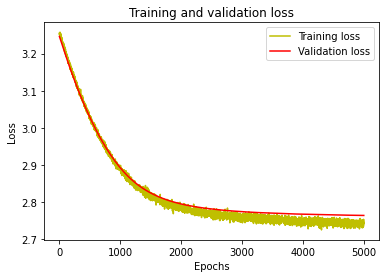

In [55]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
#plt.plot(epochs, val_acc, 'b', label = 'Accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

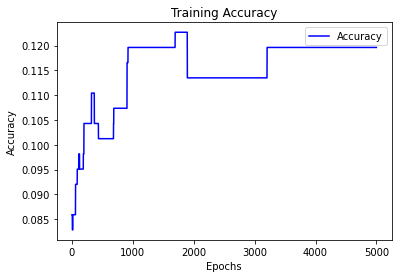

In [56]:
val_acc = history.history['val_accuracy']
epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, val_acc, 'b', label = 'Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [79]:
input_date = datetime.strptime('03/27/2021', '%m/%d/%Y')
input_week = int(input_date.strftime("%W"))  
input_week_cos = np.cos(2 * np.pi * input_week / 7)
input_week_sin = np.sin(2 * np.pi * input_week / 7)

input_data = []
input_data.append(input_week_cos)
input_data.append(input_week_sin)
input_data.append('Saturday')

unseen = pd.DataFrame([input_data], columns = ['week_cos', 'week_sin', 'Day_Name'])

In [80]:
day_str = unseen['Day_Name']
day_str

0    Saturday
Name: Day_Name, dtype: object

In [81]:
input_df = pd.DataFrame(ohe.transform(labelencoder.transform(day_str.ravel()).reshape(-1,1)).toarray().astype(int))
unseen = unseen.join(input_df)

In [82]:
unseen = unseen.drop('Day_Name', axis = 1)

In [83]:
unseen_X = scaler.transform(unseen[unseen.columns[:]])

In [84]:
unseen

,week_cos,week_sin,0,1,2,3
0,-0.222521,-0.974928,1,0,0,0


In [85]:
unseen_X

array([[3.56895868e-01, 3.33066907e-16, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [86]:
labelencoder.classes_

array(['Saturday', 'Thursday', 'Tuesday', 'Wednesday'], dtype=object)

In [87]:
pred = np.argmax(model.predict(unseen_X), axis=-1)

In [88]:
pred

array([0], dtype=int64)

In [90]:
model.predict(unseen_X)

array([[0.13165118, 0.10555875, 0.08947992, 0.09278309, 0.07219443,
        0.07233879, 0.06516545, 0.05458985, 0.03317483, 0.03682936,
        0.03178247, 0.03333071, 0.03034759, 0.01747088, 0.023239  ,
        0.02344857, 0.01313654, 0.01125871, 0.0115071 , 0.01208547,
        0.00980076, 0.00951021, 0.00540521, 0.00771677, 0.00470441,
        0.0014901 ]], dtype=float32)